SDS Data Holdings
--

This is a replacement for the various versions of data_list, a c-shell script written in about 2001. It searches a SDS directory for data files and colates what is found, including plotting the results. The existance of data is determined simply by the existance of a file, there is no check on the data within the file.

ObsPy contains a script obspy-scan http://docs.obspy.org/tutorial/code_snippets/visualize_data_availability_of_local_waveform_archive.html, but this is not always suitable for the needs.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Setup parameters**

In [3]:
#sds folder
sds = '/run/user/4007/gvfs/sftp:host=waihaha.gns.cri.nz,user=sherburn/home/sherburn/data1/my_sds'
# sds = '/run/user/4007/gvfs/sftp:host=rotokawa.gns.cri.nz/home/seisdata/data/AP1/mokai_portable/mseed_sds'
# sds = '/run/user/4007/gvfs/sftp:host=waihaha.gns.cri.nz,user=sherburn/home/sherburn/data4/SDS/geonet_sds'

#station list to check
stations_rot = ['NZ.RT01.10.EHZ', 'NZ.RT02.10.EHZ', 'NZ.RT03.10.EHZ', 'NZ.RT04.10.EHZ', 'NZ.RT05.10.EHZ', 'NZ.RT06.10.EHZ', 'NZ.RT07.10.EHZ', 'NZ.RT08.10.EHZ', 'NZ.RT09.10.EHZ', 'NZ.RT10.10.EHZ', 'NZ.RT11.10.EHZ', 'NZ.RT12.10.EHZ', 'NZ.RT13.10.EHZ', 'NZ.RT14.10.EHZ', 'NZ.RT15.10.EHZ', 'NZ.RT16.10.EHZ', 'NZ.RT17.10.EHZ', 'NZ.RT18.10.EHZ', 'NZ.RT19.10.EHZ', 'NZ.RT20.10.EHZ', 'NZ.RT21.10.EHZ', 'NZ.RT22.10.EHZ', 'NZ.RT23.10.EHZ', 'NZ.RT24.10.EHZ']
stations_nga = ['NZ.NS01.10.EHZ', 'NZ.NS02.10.EHZ', 'NZ.NS03.10.EHZ', 'NZ.NS04.10.EHZ', 'NZ.NS05.10.EHZ', 'NZ.NS06.10.EHZ', 'NZ.NS07.10.EHZ', 'NZ.NS08.10.EHZ', 'NZ.NS09.10.EHZ', 'NZ.NS10.10.EHZ', 'NZ.NS11.10.EHZ', 'NZ.NS12.10.EHZ', 'NZ.NS13.10.EHZ', 'NZ.NS14.10.EHZ', 'NZ.NS15.10.EHZ', 'NZ.NS16.10.EHZ', 'NZ.NS17.10.EHZ', 'NZ.NS18.10.EHZ']
stations_rotnga = stations_rot + stations_nga
stations_mok = ['NZ.SM01.10.EHZ', 'NZ.SM02.10.EHZ', 'NZ.SM03.10.EHZ', 'NZ.SM04.10.EHZ', 'NZ.SM05.10.EHZ', 'NZ.SM06.10.EHZ', 'NZ.SM07.10.EHZ', 'NZ.SM08.10.EHZ', 'NZ.SM09.10.EHZ', 'NZ.SM10.10.EHZ', 'NZ.SM11.10.EHZ', 'NZ.SM12.10.EHZ', 'NZ.SM13.10.EHZ', 'NZ.SM14.10.EHZ', 'NZ.SM15.10.EHZ', 'NZ.SM16.10.EHZ', 'NZ.SM17.10.EHZ', 'NZ.SM18.10.EHZ']
stations_tilt = ['NZ.COVZ.90.LAX']
stations_geonet = ['NZ.KUTZ.10.EHZ', 'NZ.HRRZ.10.EHZ', 'NZ.ALRZ.10.EHZ', 'NZ.PRRZ.10.EHZ', 'NZ.WPRZ.10.EHZ', 'NZ.THQ2.10.EHZ', 'NZ.ARAZ.10.EHZ']
stations = stations_rotnga

#first and last dates to check
date1 = '2019-01-01'
date2 = '2019-12-31'

dstart = datetime.strptime(date1, '%Y-%m-%d')
dend = datetime.strptime(date2, '%Y-%m-%d')
dates = pd.date_range(start=dstart, end=dend, freq='1D')

#number of days
ndays = (dend - dstart).days + 1

**Store file search results in a pandas dataframe for easy manipulation**

In [4]:
files = pd.DataFrame()

**Loop through files, adding information to dataframe if a file is found**

In [5]:
if os.path.isdir(sds):
    #sds folder exists, start processing
    for station in stations:
        #print ('checking station: '+station)
        (net, sta, loc, cmp) = station.split('.')
        #sta = station.split('.')[1]
        #loc = station.split('.')[2]
        #cmp = station.split('.')[3]
        
        #loop through dates
        for date in dates:
            year = date.timetuple().tm_year
            yday = date.timetuple().tm_yday
            #print ('checking date: '+str(year)+', '+str(yday).zfill(3))
            folder = os.path.join(sds, str(year), str(net), str(sta), str(cmp)+'.D')
            file = os.path.join(folder, station+'.D.'+str(year)+'.'+str(yday).zfill(3))
            
            if os.path.isfile(file):
                files = files.append({'date':date, 'site':str(sta)}, ignore_index=True)
else:
    print ('error: sds folder does not exist', sds)


**Plot the 'standard' time series**

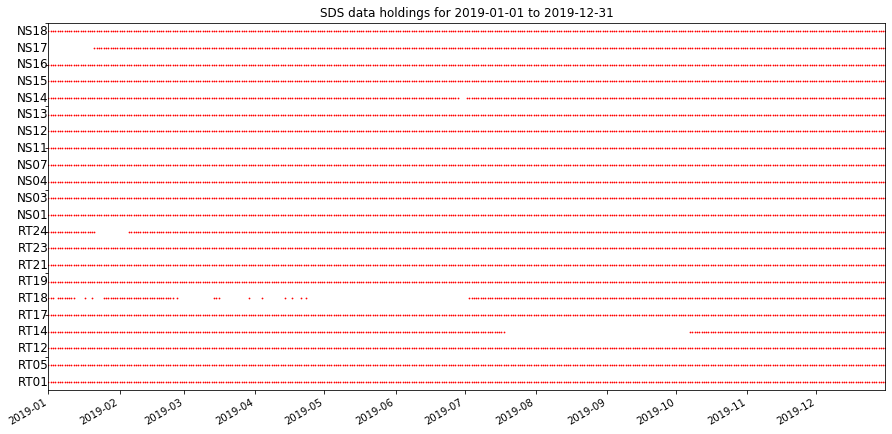

In [6]:
#setup dictionary of station name vs yvalue, for stations that have files
station_list = files.site.unique()
yvals = range(1,(1+len(files.site.unique())))
stavals = dict(zip(station_list, yvals))

#add column to dataframe based on dictionary key:value pairs
files['yval'] = files['site'].map(stavals)

#plot
pl = files.plot(x='date', y='yval', marker='.', markersize=1.5, linestyle='None', color = 'red', figsize=(15,7.5), legend=False)
pl.set_ylim(0.5, len(files.site.unique())+0.5)
pl.set_xlim(date1, date2)

#turn off y-axis tick labels
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

#x-axis label off
plt.xlabel("") #get rid of useless 'date' label

#add station names as label text
for lab,y in stavals.items():
    pl.text(dstart, y, lab, fontsize=12, horizontalalignment='right', verticalalignment='center')  

#title
title = 'SDS data holdings for '+date1+' to '+date2
plt.title(title)
    
#output
plt.savefig('sds_holdings.png', dpi=200)

**Plot data holding percentage**

In [7]:
percent = pd.DataFrame()

In [8]:
#loop through stations, calculating percentage data holdings
for site in station_list:
    pc = float(len(files[files.site == site])) / float(ndays) * 100 
    percent = percent.append({'site':site, 'percent':pc}, ignore_index=True)

percent.set_index('site', inplace=True)

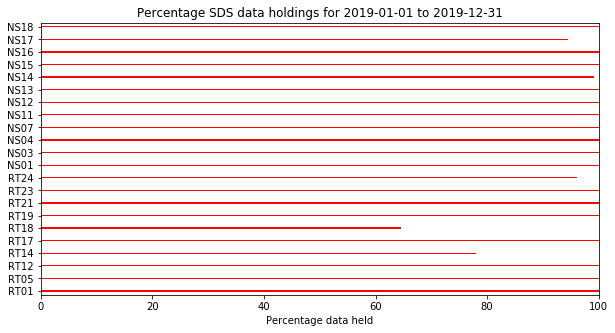

In [10]:
pcp = percent.plot.barh(figsize=(10,5), width=0.1, legend=False, color='red', edgecolor='None')
pcp.set_xlabel('Percentage data held')
plt.ylabel("")
pcp.set_xlim(0,100)
title = 'Percentage SDS data holdings for '+date1+' to '+date2
plt.title(title)
#output
plt.savefig('sds_percent_holdings.png', dpi=200)

**Mean data holdings, useful as a 'recovery' measure from a survey**

In [12]:
percent.percent.mean()

96.93648816936488